In [1]:
import pandas as pd

# Load the Excel file
df = pd.read_excel("PAPER (Responses) - Filled - Completed.xlsx")

# Clean column names (remove extra spaces, line breaks)
df.columns = df.columns.str.strip()

# Define Likert scale mappings
frequency_mapping = {
    "Never": 1,
    "Rarely": 2,
    "Sometimes": 3,
    "Frequently": 4,
    "Very frequently": 5
}

reverse_agreement_mapping = {
    "Strongly Agree": 5,
    "Agree": 4,
    "Neutral": 3,
    "Disagree": 2,
    "Strongly Disagree": 1
}

usage_mapping = {
    "Always": 4,
    "Sometimes": 3,
    "Rarely": 2,
    "Never": 1
}

unavailable_mapping = {
    "a) Manage without issue": 1,
    "b) Struggle a little": 2,
    "c) Struggle significantly": 3,
    "d) Panic or fail to complete it": 4
}

yes_no_mapping = {
    "Yes": 1,
    "No": 0
}

confidence_mapping = {
    "Very confident": 4,
    "Somewhat confident": 3,
    "Not confident": 2,
    "Rely heavily on ChatGPT": 1  # Modify if needed
}

# Map frequency-based questions (Q1–Q15 + Q22)
for col in df.columns:
    if any(keyword in col for keyword in ["How often", "How frequently", "verify or cross-check"]):
        df[col] = df[col].str.strip().map(frequency_mapping)

# Map agreement-based (reversed) questions
df["16. I feel dependent on AI for academic success"] = df["16. I feel dependent on AI for academic success"].str.strip().map(reverse_agreement_mapping)
df["19. I feel that using AI reduces the effort I put into thinking and solving problems myself"] = df["19. I feel that using AI reduces the effort I put into thinking and solving problems myself"].str.strip().map(reverse_agreement_mapping)

# Map Q17
df["17. If AI were unavailable during exams, projects or submissions, I would"] = df["17. If AI were unavailable during exams, projects or submissions, I would"].str.strip().map(unavailable_mapping)

# Map Q18 (usage style)
df["18. I use AI even when I already know how to complete a task, just to save time"] = df["18. I use AI even when I already know how to complete a task, just to save time"].str.strip().map(usage_mapping)

# Map Q20 (Yes/No)
df["20. Since using AI, I have developed the habit of checking multiple sources"] = df["20. Since using AI, I have developed the habit of checking multiple sources"].str.strip().map(yes_no_mapping)

# Map Q23 (confidence)
df["23. How confident are you in completing the same academic task without using AI"] = df["23. How confident are you in completing the same academic task without using AI"].str.strip().map(confidence_mapping)

# ✅ Optional: Save cleaned data to a new Excel file
df.to_excel("Converted_Likert_Survey.xlsx", index=False)


In [3]:
import pandas as pd

# Load your dataset
df = pd.read_excel("/content/Converted_Likert_Survey.xlsx")

# Define the dependence-related columns (update these if your column names are different)
dependence_columns = ['16. I feel dependent on AI for academic success',
       '17. If AI were unavailable during exams, projects or submissions, I would',
       '18. I use AI even when I already know how to complete a task, just to save time',
       '19. I feel that using AI reduces the effort I put into thinking and solving problems myself',
       '20. Since using AI, I have developed the habit of checking multiple sources']

# Compute each student's average dependence score
df['dependence_score'] = df[dependence_columns].mean(axis=1)

# Calculate the overall average dependence score across all students
threshold = df['dependence_score'].mean()
print(f"Calculated threshold (dataset average): {threshold:.2f}")

# Classify students based on this threshold
df['user_type'] = df['dependence_score'].apply(lambda x: 'Dependent' if x >= threshold else 'Support')

# Optional: save the result
df.to_csv("clats.csv", index=False)

# Preview the results
print(df[['dependence_score', 'user_type']].head())


Calculated threshold (dataset average): 2.30
   dependence_score  user_type
0               2.8  Dependent
1               3.4  Dependent
2               2.4  Dependent
3               2.8  Dependent
4               2.4  Dependent


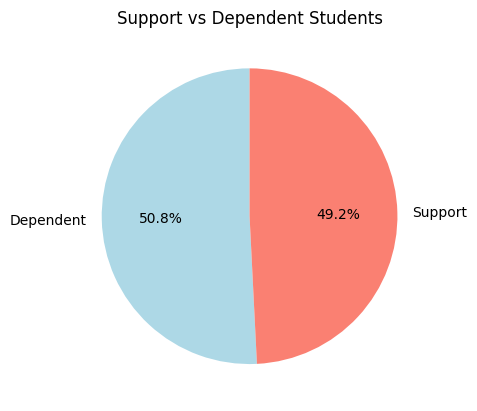

In [4]:
import matplotlib.pyplot as plt

df['user_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon'])
plt.title("Support vs Dependent Students")
plt.ylabel('')
plt.show()


Threshold method

In [8]:
import pandas as pd

# Load your dataset
df = pd.read_excel("/content/Converted_Likert_Survey.xlsx")

# Rename Q16–Q19 for clarity if needed (optional)
# Or make sure they match your column names exactly
dependence_columns = [

      #' 1. How often do you use AI for educational purposes?',
       '2. How often do you rely on AI for academic research, such as summarizing papers or finding sources and structure research papers?',
       '3. How often do you rely on AI for debugging errors,improving efficiency or understanding complex algorithms and data structures?',
       '4. How frequently do you use AI based tools to improve soft skills like emotional intelligence,leadership and decision-making?',
       '5. How frequently do you use AI powered explanations to understand complex aptitude problems,pattern and logical reasoning?',
       '6. How often do you turn to AI for out of syllabus learning?',
       '7. How frequently do you use AI to prepare for technical interviews?',
       '8. How often do you use AI for writing assignments (e.g., essays, reports, thesis writing)?',
       '9. How often do you use AI for exam preparation and study revision (e.g., generating study guides, quizzes)?',
       '10. How often do you use AI for solving mathematical problems (e.g., step-by-step solutions, formulas)?',
       '11. How often do you use AI for language learning (e.g., improving grammar, translations, learning new words)?',
       '12. How often do you use AI for understanding difficult concepts (e.g., getting simplified explanations)?',
       '13. How often do you use AI tools to enhance your resume for placements?',
       '14. How often do you use AI for generating creative content (e.g., writing stories, poems, brainstorming ideas)?',
       '15. How often do you use AI for participating in hackathons and symposium like idea generation,code help,presentation preparation?',
       '16. I feel dependent on AI for academic success',
       '17. If AI were unavailable during exams, projects or submissions, I would',
       '18. I use AI even when I already know how to complete a task, just to save time',
       '19. I feel that using AI reduces the effort I put into thinking and solving problems myself',
       '20. Since using AI, I have developed the habit of checking multiple sources',
       '21. When you use AI for assignments or writing tasks, do you',
       '22 .How often do you verify or cross-check the information AI provides',
       '23. How confident are you in completing the same academic task without using AI'
]

# Convert columns to numeric, handling errors
for col in dependence_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Compute average dependence score
df['dependence_score'] = df[dependence_columns].mean(axis=1)

# Set your threshold (you can tweak this — 3.5 is a common mid-scale cutoff)
threshold = 2.30

# Classify each student
df['user_type'] = df['dependence_score'].apply(lambda x: 'Dependent' if x >= threshold else 'Support')

# Optional: save result to new file
df.to_csv("classifiedstudents.csv", index=False)

print(df[['dependence_score', 'user_type']].head())

   dependence_score  user_type
0          3.190476  Dependent
1          2.900000  Dependent
2          3.285714  Dependent
3          3.750000  Dependent
4          3.857143  Dependent


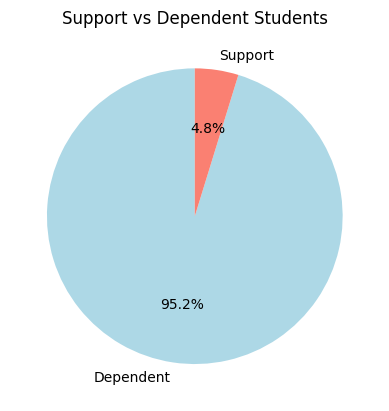

In [9]:
import matplotlib.pyplot as plt

df['user_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon'])
plt.title("Support vs Dependent Students")
plt.ylabel('')
plt.show()


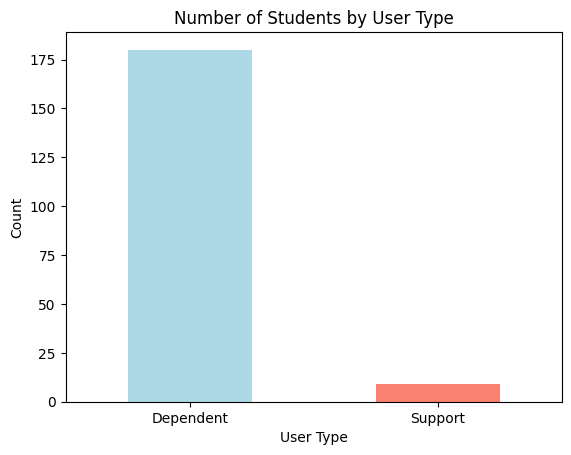

In [10]:
df['user_type'].value_counts().plot(kind='bar', color=['lightblue', 'salmon'])
plt.title("Number of Students by User Type")
plt.xlabel("User Type")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


In [27]:
from scipy.stats import ttest_ind

# Strip whitespace from columns (if not already done)
df.columns = df.columns.str.strip()

# Extract question columns (update this list if needed)
question_cols = [
   '1. How often do you use AI for educational purposes?',
   '2. How often do you rely on AI for academic research, such as summarizing papers or finding sources and structure research papers?',
   '3. How often do you rely on AI for debugging errors,improving efficiency or understanding complex algorithms and data structures?',
   '4. How frequently do you use AI based tools to improve soft skills like emotional intelligence,leadership and decision-making?',
   '5. How frequently do you use AI powered explanations to understand complex aptitude problems,pattern and logical reasoning?',
   '6. How often do you turn to AI for out of syllabus learning?',
   '7. How frequently do you use AI to prepare for technical interviews?',
   '8. How often do you use AI for writing assignments (e.g., essays, reports, thesis writing)?',
   '9. How often do you use AI for exam preparation and study revision (e.g., generating study guides, quizzes)?',
   '10. How often do you use AI for solving mathematical problems (e.g., step-by-step solutions, formulas)?',
   '11. How often do you use AI for language learning (e.g., improving grammar, translations, learning new words)?',
   '12. How often do you use AI for understanding difficult concepts (e.g., getting simplified explanations)?',
   '13. How often do you use AI tools to enhance your resume for placements?',
   '14. How often do you use AI for generating creative content (e.g., writing stories, poems, brainstorming ideas)?',
   '15. How often do you use AI for participating in hackathons and symposium like idea generation,code help,presentation preparation?',
   '16. I feel dependent on AI for academic success',
   '17. If AI were unavailable during exams, projects or submissions, I would',
   '18. I use AI even when I already know how to complete a task, just to save time',
   '19. I feel that using AI reduces the effort I put into thinking and solving problems myself',
   '20. Since using AI, I have developed the habit of checking multiple sources',
   '21. When you use AI for assignments or writing tasks, do you',
   '22 .How often do you verify or cross-check the information AI provides',
   '23. How confident are you in completing the same academic task without using AI'
]

# Ensure numeric values
df[question_cols] = df[question_cols].apply(pd.to_numeric, errors='coerce')

# Separate groups
support_group = df[df['user_type'] == 'Support']
dependent_group = df[df['user_type'] == 'Dependent']

# Store results
ttest_results = []

for question in question_cols:
    s_vals = support_group[question].dropna()
    d_vals = dependent_group[question].dropna()

    # Perform t-test only if both groups have sufficient data
    if len(s_vals) >= 2 and len(d_vals) >= 2:
        t_stat, p_val = ttest_ind(s_vals, d_vals, equal_var=False)
    else:
        t_stat, p_val = None, None  # Insufficient data

    ttest_results.append({
        'Question': question,
        'Support Mean': s_vals.mean() if len(s_vals) > 0 else None,
        'Dependent Mean': d_vals.mean() if len(d_vals) > 0 else None,
        't-stat': t_stat,
        'p-value': p_val
    })

# Convert to DataFrame
ttest_df = pd.DataFrame(ttest_results)

# Sort by significance
ttest_df = ttest_df.sort_values(by='p-value', na_position='last')

# Display all results
print(ttest_df[['Question', 'Support Mean', 'Dependent Mean', 't-stat', 'p-value']])

# Optional: save results
ttest_df.to_csv("t_test_results_support_vs_dependent.csv", index=False)

                                             Question  Support Mean  \
12  13. How often do you use AI tools to enhance y...      1.222222   
3   4. How frequently do you use AI based tools to...      1.555556   
10  11. How often do you use AI for language learn...      1.666667   
6   7. How frequently do you use AI to prepare for...      1.555556   
11  12. How often do you use AI for understanding ...      2.444444   
9   10. How often do you use AI for solving mathem...      1.777778   
13  14. How often do you use AI for generating cre...      1.666667   
14  15. How often do you use AI for participating ...      2.222222   
7   8. How often do you use AI for writing assignm...      2.444444   
8   9. How often do you use AI for exam preparatio...      2.444444   
1   2. How often do you rely on AI for academic re...      2.666667   
16  17. If AI were unavailable during exams, proje...      2.000000   
5   6. How often do you turn to AI for out of syll...      2.666667   
0   1.

K means

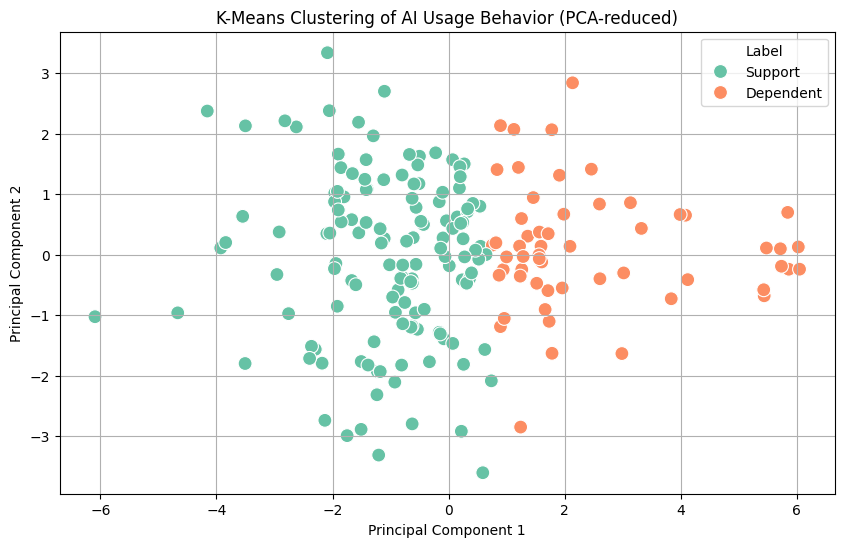

        PC1       PC2 KMeans_Label
0  0.539848  0.803918      Support
1 -1.105954  2.704300      Support
2  2.136206  2.843999    Dependent
3  3.133812  0.861839    Dependent
4  4.083670  0.655155    Dependent


In [34]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer # Import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = '/content/Converted_Likert_Survey.xlsx'
df = pd.read_excel(file_path)
df.columns = df.columns.str.strip()  # Clean column names


# Relevant columns
question_cols = [
  '1. How often do you use AI for educational purposes?',
   '2. How often do you rely on AI for academic research, such as summarizing papers or finding sources and structure research papers?',
   '3. How often do you rely on AI for debugging errors,improving efficiency or understanding complex algorithms and data structures?',
   '4. How frequently do you use AI based tools to improve soft skills like emotional intelligence,leadership and decision-making?',
   '5. How frequently do you use AI powered explanations to understand complex aptitude problems,pattern and logical reasoning?',
   '6. How often do you turn to AI for out of syllabus learning?',
   '7. How frequently do you use AI to prepare for technical interviews?',
   '8. How often do you use AI for writing assignments (e.g., essays, reports, thesis writing)?',
   '9. How often do you use AI for exam preparation and study revision (e.g., generating study guides, quizzes)?',
   '10. How often do you use AI for solving mathematical problems (e.g., step-by-step solutions, formulas)?',
   '11. How often do you use AI for language learning (e.g., improving grammar, translations, learning new words)?',
   '12. How often do you use AI for understanding difficult concepts (e.g., getting simplified explanations)?',
   '13. How often do you use AI tools to enhance your resume for placements?',
   '14. How often do you use AI for generating creative content (e.g., writing stories, poems, brainstorming ideas)?',
   '15. How often do you use AI for participating in hackathons and symposium like idea generation,code help,presentation preparation?',
   '16. I feel dependent on AI for academic success',
   '17. If AI were unavailable during exams, projects or submissions, I would',
   '18. I use AI even when I already know how to complete a task, just to save time',
   '19. I feel that using AI reduces the effort I put into thinking and solving problems myself',
   '20. Since using AI, I have developed the habit of checking multiple sources',
   #'21. When you use AI for assignments or writing tasks, do you',
   '22 .How often do you verify or cross-check the information AI provides',
   '23. How confident are you in completing the same academic task without using AI'
]

# Convert relevant columns to numeric, coercing errors to NaN
for col in question_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
df[question_cols] = imputer.fit_transform(df[question_cols])


# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[question_cols])

# PCA
pca = PCA(n_components=2)  # Reduce to 2D for visualization
pca_components = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])

# K-Means clustering (2 clusters for 'Dependent' vs 'Support')
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10) # Add n_init
pca_df['Cluster'] = kmeans.fit_predict(pca_df[['PC1', 'PC2']])

# Interpret cluster labels: assume cluster with higher PC1 score = "Dependent"
mean_pc1 = pca_df.groupby('Cluster')['PC1'].mean()
dep_cluster = mean_pc1.idxmax()
pca_df['KMeans_Label'] = pca_df['Cluster'].apply(lambda x: 'Dependent' if x == dep_cluster else 'Support')

# Optional: Combine with original data
final_df = pd.concat([df, pca_df], axis=1)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='KMeans_Label', palette='Set2', s=100)
plt.title('K-Means Clustering of AI Usage Behavior (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Label')
plt.grid(True)
plt.show()
# Preview results
print(final_df[['PC1', 'PC2', 'KMeans_Label']].head())

In [35]:
from sklearn.cluster import KMeans

# Perform KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(pca_df[['PC1', 'PC2']])
pca_df['Cluster'] = clusters

# Determine which cluster is 'Support'
# Assumption: lower PC1 + PC2 score => less reliance => Support
cluster_means = pca_df.groupby('Cluster')[['PC1', 'PC2']].mean().sum(axis=1)
support_cluster = cluster_means.idxmin()

# Assign labels
pca_df['Final_Label'] = pca_df['Cluster'].apply(lambda x: 'Support' if x == support_cluster else 'Dependent')

# Count the number of each label
label_counts = pca_df['Final_Label'].value_counts()
print(label_counts)


Final_Label
Support      133
Dependent     56
Name: count, dtype: int64


Prinipal Component Analysis

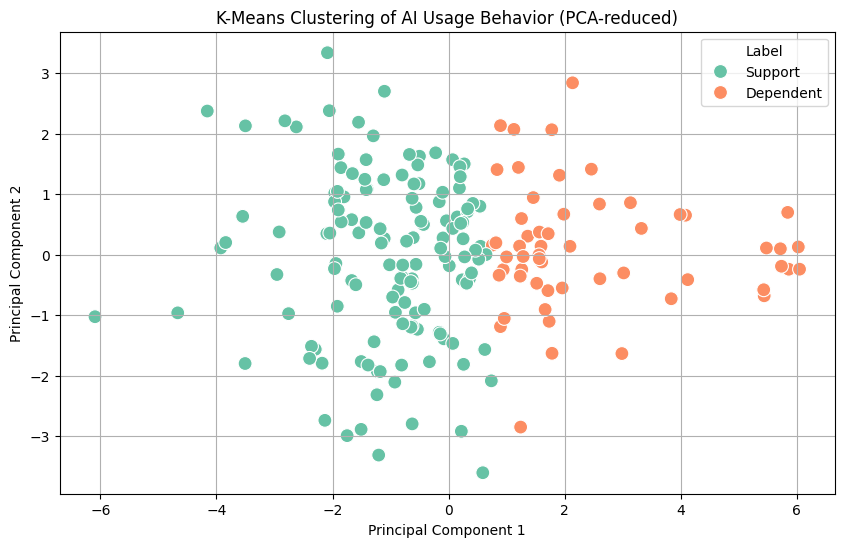

,PC1,PC2,KMeans_Label
0,0.539848,0.803918,Support
1,-1.105954,2.704300,Support
2,2.136206,2.843999,Dependent
3,3.133812,0.861839,Dependent
4,4.083670,0.655155,Dependent


In [52]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer # Import SimpleImputer


# Load dataset
file_path = '/content/Converted_Likert_Survey.xlsx'
df = pd.read_excel(file_path)
df.columns = df.columns.str.strip()  # Clean column names

# Relevant columns
question_cols = [
    '1. How often do you use AI for educational purposes?',
    '2. How often do you rely on AI for academic research, such as summarizing papers or finding sources and structure research papers?',
    '3. How often do you rely on AI for debugging errors,improving efficiency or understanding complex algorithms and data structures?',
    '4. How frequently do you use AI based tools to improve soft skills like emotional intelligence,leadership and decision-making?',
    '5. How frequently do you use AI powered explanations to understand complex aptitude problems,pattern and logical reasoning?',
    '6. How often do you turn to AI for out of syllabus learning?',
    '7. How frequently do you use AI to prepare for technical interviews?',
    '8. How often do you use AI for writing assignments (e.g., essays, reports, thesis writing)?',
    '9. How often do you use AI for exam preparation and study revision (e.g., generating study guides, quizzes)?',
    '10. How often do you use AI for solving mathematical problems (e.g., step-by-step solutions, formulas)?',
    '11. How often do you use AI for language learning (e.g., improving grammar, translations, learning new words)?',
    '12. How often do you use AI for understanding difficult concepts (e.g., getting simplified explanations)?',
    '13. How often do you use AI tools to enhance your resume for placements?',
    '14. How often do you use AI for generating creative content (e.g., writing stories, poems, brainstorming ideas)?',
    '15. How often do you use AI for participating in hackathons and symposium like idea generation,code help,presentation preparation?',
    '16. I feel dependent on AI for academic success',
    '17. If AI were unavailable during exams, projects or submissions, I would',
    '18. I use AI even when I already know how to complete a task, just to save time',
    '19. I feel that using AI reduces the effort I put into thinking and solving problems myself',
    '20. Since using AI, I have developed the habit of checking multiple sources',
    '22 .How often do you verify or cross-check the information AI provides',
    '23. How confident are you in completing the same academic task without using AI'
]

# Convert relevant columns to numeric, coercing errors to NaN
for col in question_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
df[question_cols] = imputer.fit_transform(df[question_cols])


# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[question_cols])

# PCA
pca = PCA(n_components=2)  # Reduce to 2D for visualization
pca_components = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])

# K-Means clustering (2 clusters for 'Dependent' vs 'Support')
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10) # Add n_init
pca_df['Cluster'] = kmeans.fit_predict(pca_df[['PC1', 'PC2']])

# Interpret cluster labels: assume cluster with higher PC1 score = "Dependent"
mean_pc1 = pca_df.groupby('Cluster')['PC1'].mean()
dep_cluster = mean_pc1.idxmax()
pca_df['KMeans_Label'] = pca_df['Cluster'].apply(lambda x: 'Dependent' if x == dep_cluster else 'Support')

# Optional: Combine with original data
final_df = pd.concat([df, pca_df], axis=1)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='KMeans_Label', palette='Set2', s=100)
plt.title('K-Means Clustering of AI Usage Behavior (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Label')
plt.grid(True)
plt.show()

# Preview results
display(final_df[['PC1', 'PC2', 'KMeans_Label']].head())

In [53]:
from sklearn.cluster import KMeans

# Perform KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(pca_df[['PC1', 'PC2']])
pca_df['Cluster'] = clusters

# Determine which cluster is 'Support'
# Assumption: lower PC1 + PC2 score => less reliance => Support
cluster_means = pca_df.groupby('Cluster')[['PC1', 'PC2']].mean().sum(axis=1)
support_cluster = cluster_means.idxmin()

# Assign labels
pca_df['Final_Label'] = pca_df['Cluster'].apply(lambda x: 'Support' if x == support_cluster else 'Dependent')

# Count the number of each label
label_counts = pca_df['Final_Label'].value_counts()
print(label_counts)


Final_Label
Support      133
Dependent     56
Name: count, dtype: int64
